# HSMA 3C: Exercise 3 - Getting travel times from an API

## Extension

Import the required packages.

In [1]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import routingpy as rp
import contextily as cx

### Getting and plotting travel time matrices

The code below will 
- create a dataframe of the population-weighted centroids of York and Hull
- create a dataframe of the LSOA boundaries of York and Hull
- create a map showing the LSOA boundaries of York and Hull with the population-weighted centroids of each LSOA

First, read through this code and try to understand what it is doing.

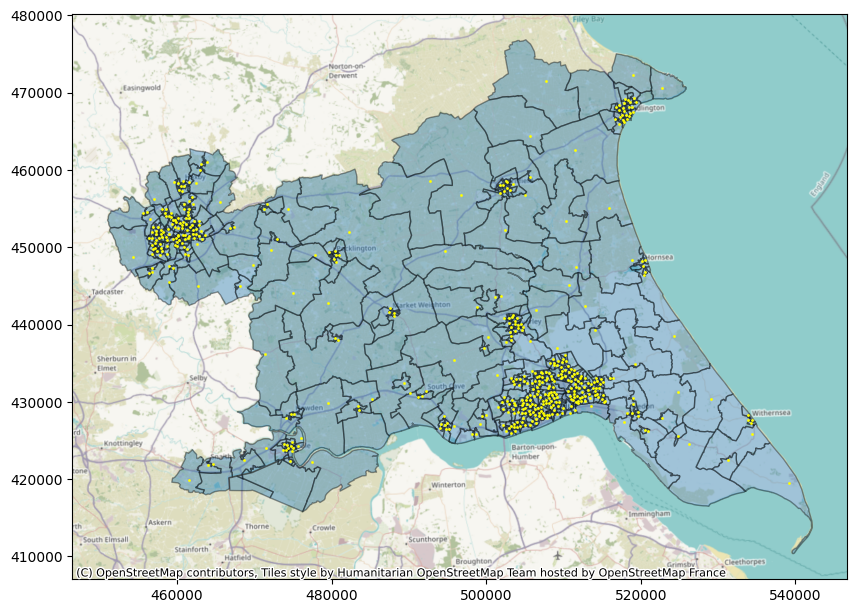

In [2]:
lsoa_centroids_2021 = pd.merge(
    geopandas.read_file("../datasets/exercises_2_and_3/LSOA_Dec_2021_PWC_for_England_Wales_2022.geojson"),
    geopandas.read_file("../datasets/exercises_2_and_3/Lower_layer_Super_Output_Areas_2021_EW_BGC_V3.geojson")[["LSOA21CD", "LSOA21NM"]],
    left_on="LSOA21CD",
    right_on="LSOA21CD"
).sort_values('LSOA21NM')

lsoa_centroids_2021_york = lsoa_centroids_2021[lsoa_centroids_2021["LSOA21NM"].str.contains("York|Hull")]

lsoa_boundaries_2021 = geopandas.read_file("../datasets/exercises_2_and_3/Lower_layer_Super_Output_Areas_2021_EW_BGC_V3.geojson")
lsoa_boundaries_2021_york = lsoa_boundaries_2021[lsoa_boundaries_2021["LSOA21NM"].str.contains("York|Hull")]

ax = lsoa_boundaries_2021_york.plot(alpha=0.4, edgecolor='black', figsize=(10,8))
lsoa_centroids_2021_york.plot(color="yellow", ax=ax, markersize=1)

cx.add_basemap(ax, crs=lsoa_boundaries_2021_york.crs.to_string(), zoom=10)

### Getting the data into the right format for routingpy

Load in the potential clinic locations from **york_clinics_4.csv**.

In [ ]:
york_clinic_locations = ## YOUR CODE HERE

Convert the centroids in `lsoa_centroids_2021_york` from EPSG:27700 (northings/eastings) to EPSG:4326 (lat/long) as this is the right format for the routingpy service.

Hint: the **to_crs** method will do what you need here!

In [ ]:
lsoa_centroids_2021_3857 = ## YOUR CODE HERE

Use **zip** on the geometry column to pull out pairs of *source* coordinates (source = our LSOA centroids - where potential patients will come from)

HINT: Remember that routingpy expects the **longitude** before the **latitude**. 

In [ ]:
source_coord_pairs = ## YOUR CODE HERE

The output of this will give you a list of tuples. 

Now turn these tuples into lists using a list comprehension. 

In [ ]:
source_coord_pairs_list = ## YOUR CODE HERE

Repeat the steps above, but this time for the data in **york_clinic_locations**.

Remember - york clinic locations is a standard pandas dataframe at this point - not a geodataframe.

You either need to convert it to a geodataframe first, or write your code very slightly differently.

In [ ]:
destination_coord_pairs = ## YOUR CODE HERE
destination_coord_pairs_list = ## YOUR CODE HERE

Join the two lists into one. 

In [ ]:
all_coordinates = []

## YOUR CODE HERE

Use a list comprehension to create a list that shows the locations of the coordinates relating to our **sources**.

In [ ]:
source_indices = ##YOUR CODE HERE

Use a list comprehension to create a list that shows the locations of the coordinates relating to our **destinations**.

In [ ]:
destination_indices = ##YOUR CODE HERE

### Using routingpy

Set up routingpy.

You will need to set up an account on the openroute service here: https://openrouteservice.org/

In [ ]:
ors_api_key = # YOUR CODE HERE

ors_api = # YOUR CODE HERE

Request the data back from routingpy.

In [ ]:
travel_matrix_york_4_clinics = ors_api.matrix(
    locations = ...,

    profile = ...,

    sources = ...,

    destinations = ...
)

Take a look at the **durations** attribute of our matrix.

In [ ]:
## YOUR CODE HERE

Convert this to a dataframe.

In [ ]:
york_4_clinics_travel_df = pd.DataFrame(
    ...,
    columns = ...,
    index = ...
)

Work out the shortest travel time for each location. 

Remember: the results will be in seconds, not minutes.  

In [ ]:
york_4_clinics_travel_df['shortest_minutes'] = ## YOUR CODE HERE

Create either a static or interactive plot (whichever you would prefer to have some more practice with!) 
- showing the LSOAs, coloured by travel time
- showing the clinic sites

If making a static plot, label each site with its name (Clinic 1, Clinic 2, Clinic 3, Clinic 4).

If making an interactive plot, set the clinic names as tooltips for the markers.

Hint: you don't have a geodataframe at this point! Join it back up with `lsoa_boundaries_2021_york`. 

You may want to run the `.reset_index()` method on `york_4_clinics_travel_df` to make it easier to join. 

In [ ]:
## YOUR CODE HERE

## Challenge: Bonus Exercises

### 1. Getting and plotting isochrone data

Take a look at the slides on making isochrones at the following link.

[LINK](https://docs.google.com/presentation/d/1WnSsaT_0cNFp4W4Q0YVlXCTzyLcPVIvt3VMtwTrU9O4/edit?usp=sharing)

Load the additional requried libraries for this step.

In [ ]:
from shapely.geometry import Polygon

Create an isochrone map for the first clinic in the clinic list for 5, 10 and 15 minutes on foot.

In [ ]:
## YOUR CODE HERE

Write a for loop to generate isochrone maps for all four clinics.

In [ ]:
## YOUR CODE HERE

Plot the four isochrone maps in separate subplots using matplotlib.

In [ ]:
## YOUR CODE HERE

Plot the four isochrone maps on the same static (matplotlib) plot.

In [ ]:
## YOUR CODE HERE

### 2. Making multiple requests to the ORS API

In the datasets folder is another file called **york_clinics_9.csv**.

However, requesting the data for 9 clinics means we will exceed the number of requests you can make to the routingpy API at once. A matrix request can be up to 50 x 50 (2500 pairs) or any other combination that produces <= 2500 results (e.g. 250 sources and 10 destinations, 2500 sources and 1 destination, 1250 sources and 2 destinations)

Think about how you could split up your requests in such a way that you can get all of the required travel times. 

Once you have done this, create a new plot showing the travel times.

In [ ]:
## YOUR CODE HERE

Try comparing the average travel time across the region with 4 and 9 clinics. 

In [ ]:
## YOUR CODE HERE

### 3. Making interactive isochrone maps

Investigate whether it is possible to display the isochrone data using Folium. 

In [ ]:
## YOUR CODE HERE